<a href="https://colab.research.google.com/github/sk27110/basic_ml_hse/blob/task_2_intro_ml/homework_02_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 2: Линейные модели. Работа с признаками

Задание выполнил(а):

   Кочетков Александр
   

## Общая информация

__Внимание!__  


* Домашнее задание выполняется самостоятельно
* Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов
* Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов
* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе

Каждое задание весит 1 или 2 балла (указано рядом с номером задания). Всего в сумме можно получить, если правильно решить все задания, 12 баллов.

## Импорт библиотек и загрузка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этом задании мы рассмотрим различные аспекты построения линейной модели. Будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [3]:
DIAMONDS = 'https://raw.githubusercontent.com/evgpat/datasets/main/diamonds.csv'

In [4]:
data = pd.read_csv(DIAMONDS)
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов

In [5]:
data.dtypes

,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1 (1 балл)

Есть ли в наборе данных пропущенные значения? Если да, удалите строки с ними.

Также выведите на экран число пропусков в каждом столбце.

In [6]:
data.isnull().sum().sum()


0

### Задача 2 (1 балл)

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их. Поясните свой выбор (напишите текстом обоснование)

Столбец 'Unnamed: 0' явно не несет никакой информации, удалим его


In [7]:
data.drop(columns=['Unnamed: 0'], inplace = True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Задание 3 (1 балл)

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

Больше всего коррелирует признак 'carat'

In [8]:
data.select_dtypes(include='number').corr()['price']


,price
carat,0.921591
depth,-0.010647
table,0.127134
price,1.000000
x,0.884435
y,0.865421
z,0.861249


### Задание 4 (1 балл)  

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) или `sklearn.OneHotEncoder`). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

In [120]:
data_dum = pd.get_dummies(data, drop_first=True)
data_dum.shape[1]
data_dum

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,True,...,True,False,False,False,False,True,False,False,False,False


### Задание 5 (1 балл)

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`.  
Также создайте вектор `y`, содержащий целевую переменную `price`.

In [10]:
data_dum
X = data_dum.drop('price', axis=1)
y = data['price']


Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`

При разбиении укажите `random_state = 42`

In [11]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=42)

### Задание 6 (1 балл)

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему

In [12]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
normalizer.fit(Xtrain)
Xtrain_norm = normalizer.transform(Xtrain)
Xtest_norm = normalizer.transform(Xtest)

Xtrain_norm = pd.DataFrame(Xtrain_norm, columns=Xtrain.columns)
Xtest_norm = pd.DataFrame(Xtest_norm, columns=Xtest.columns)


### Задание 7 (1 балл)

Обучите линейную регрессию на тренировочной выборке. Выведите r2-score на тренировочной и тестовой выборках

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(Xtrain, ytrain)

y_train_predict = model.predict(Xtrain)
y_test_predict = model.predict(Xtest)

r2_train = r2_score(ytrain, y_train_predict)
r2_test = r2_score(ytest, y_test_predict)

print("train:", r2_train)
print("test:", r2_test)


train: 0.9195976267987521
test: 0.9201866914388087


### Задание 8 (1 балл)

Выведите на экран веса, которые линейная регрессия присвоила признакам. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных

Как мы видим, вещественной переменной с наибольшим весом является 'carat'

In [14]:
for i, j in zip(X.columns, model.coef_):
  print(i,':',j)

carat : 11226.205118393187
depth : -63.11991127922215
table : -27.0960563497739
x : -980.5492381907375
y : -5.633152991159792
z : -48.154764377679825
cut_Good : 595.5210801260571
cut_Ideal : 846.1962575490003
cut_Premium : 777.7699627551752
cut_Very Good : 743.3013602895883
color_E : -217.0289677372995
color_F : -273.30397584051286
color_G : -500.1602381768899
color_H : -998.6346691711647
color_I : -1476.0842333201977
color_J : -2381.989788469745
clarity_IF : 5459.037299756206
clarity_SI1 : 3751.7096712587213
clarity_SI2 : 2781.9405481388135
clarity_VS1 : 4657.834307077783
clarity_VS2 : 4336.7255829779115
clarity_VVS1 : 5101.335181071194
clarity_VVS2 : 5028.29553043661


## Попытка улучшить качество модели

Эта часть является творческой, и задания в ней немного сложнее, чем предыдущие.  
Поэтому за каждое из них можно получить до двух баллов.

### Задание 9 (2 балла)

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [15]:
X.select_dtypes(include='number').corr()

,carat,depth,table,x,y,z
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


Как мы видим, признак 'carat' больше всего коррелирует с остальными. Удалим его

In [16]:
new_Xtrain = Xtrain.drop('carat', axis = 1)
new_Xtest = Xtest.drop('carat', axis = 1)

model = LinearRegression()

model.fit(new_Xtrain, ytrain)

new_y_train_predict = model.predict(new_Xtrain)
new_y_test_predict = model.predict(new_Xtest)

new_r2_train = r2_score(ytrain, new_y_train_predict)
new_r2_test = r2_score(ytest, new_y_test_predict)

print("train:", new_r2_train)
print("test:", new_r2_test)


train: 0.8401690117841832
test: 0.8396814679276637


Качество только ухудшилось, удалим признаки 'y' и 'z', так как признаки 'x', 'y' и 'z' сильно коррелируют друг с другом

In [17]:
new_Xtrain = Xtrain.drop(['y', 'z'], axis = 1)
new_Xtest = Xtest.drop(['y', 'z'], axis = 1)

model = LinearRegression()

model.fit(new_Xtrain, ytrain)

new_y_train_predict = model.predict(new_Xtrain)
new_y_test_predict = model.predict(new_Xtest)

new_r2_train = r2_score(ytrain, new_y_train_predict)
new_r2_test = r2_score(ytest, new_y_test_predict)

print("train:", new_r2_train)
print("test:", new_r2_test)

train: 0.9195930916084882
test: 0.920189104854317


Качество по сравнению с исходной моделью почти не изменилось. А давайте удалим все кроме 'carat'

In [18]:
new_Xtrain = Xtrain.drop(['depth',	'table',	'x',	'y',	'z'], axis = 1)
new_Xtest = Xtest.drop(['depth',	'table',	'x',	'y',	'z'], axis = 1)

model = LinearRegression()

model.fit(new_Xtrain, ytrain)

new_y_train_predict = model.predict(new_Xtrain)
new_y_test_predict = model.predict(new_Xtest)

new_r2_train = r2_score(ytrain, new_y_train_predict)
new_r2_test = r2_score(ytest, new_y_test_predict)

print("train:", new_r2_train)
print("test:", new_r2_test)

train: 0.9158450864939229
test: 0.9161097076482663


Кажется цена в основном зависит от 'carat'

### Задание 10 (2 балла)

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


X = data_dum.drop(['price'], axis=1)
y = data['price']

X, y = shuffle(X, y, random_state=0)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=42)


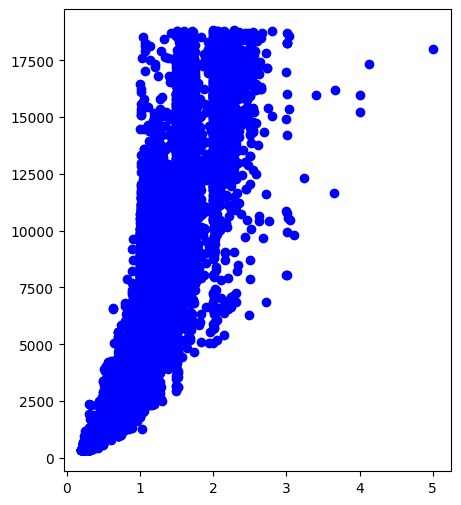

In [166]:
plt.figure(figsize=(5,6))
plt.scatter(Xtrain['carat'], ytrain, color='blue', label='Data points')


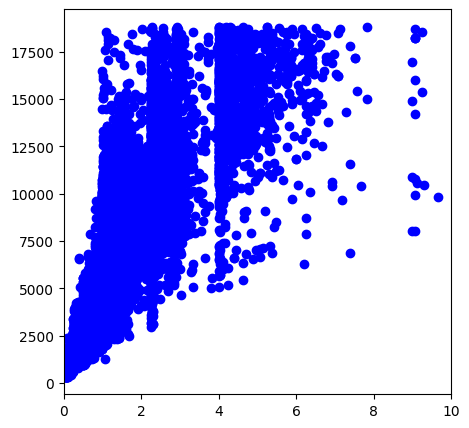

In [171]:
Xtrain['f(carat)'] = np.power(Xtrain['carat'],2)
Xtest['f(carat)'] = np.power(Xtest['carat'], 2)
plt.figure(figsize=(5,5))
plt.xlim(0,10)
plt.scatter(Xtrain['f(carat)'], ytrain, color='blue', label='Data points')

In [172]:
from sklearn.preprocessing import StandardScaler

# Xtrain.drop('carat', inplace = True, axis=1)
# Xtest.drop('carat', inplace = True, axis=1)

normalizer = StandardScaler()
normalizer.fit(Xtrain)
Xtrain_norm = normalizer.transform(Xtrain)
Xtest_norm = normalizer.transform(Xtest)

Xtrain_norm = pd.DataFrame(Xtrain_norm, columns=Xtrain.columns)
Xtest_norm = pd.DataFrame(Xtest_norm, columns=Xtest.columns)

In [173]:

from sklearn.linear_model import Lasso, Ridge

model = LinearRegression()

model.fit(Xtrain_norm, ytrain)

new_y_train_predict = model.predict(Xtrain_norm)
new_y_test_predict = model.predict(Xtest_norm)

new_r2_train = r2_score(ytrain, new_y_train_predict)
new_r2_test = r2_score(ytest, new_y_test_predict)

print("train:", new_r2_train)
print("test:", new_r2_test)

train: 0.9206416415029988
test: 0.9230858813908944


без признака 'volume' точность на тестовой выборке чуть больше. С признаком 'volume' точность на обучающей выборке повысилась, а на тестовой понизилась.

## Выводы

Сделайте выводы, исходя из проделанной работы.

Какого наилучшего качества удалось добиться? Хорошее ли это качество на ваш взгляд? Что для этого вам пришлось сделать?

Наилучший результат -- это 0.9204389151877741 на тестовой выборке. Это довольно хорошее качество. Для этого пришлось добавить два новых признака -- отношения сторон друг к другу.

> Добавить блок с цитатой



In [ ]:
# ваш код здесь
...